In [8]:
# Install and load packages

library(readr)
library(dplyr) 
library(ggplot2)
library(corrplot)

data<-read_csv("C:/Users/Admin/OneDrive/Pictures/auto_clean.csv")

head(data)
colnames(data)

Rows: 159 Columns: 26
── Column specification ────────────────────────────────────────────────────────────────────────────────────────────────
Delimiter: ","
chr  (8): make, fuel_type, aspiration, body_style, drive_wheels, engine_loca...
dbl (18): symboling, normalized_losses, num_doors, wheel_base, length, width...

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.


symboling,normalized_losses,make,fuel_type,aspiration,num_doors,body_style,drive_wheels,engine_location,wheel_base,⋯,engine_size,fuel_system,bore,stroke,compression_ratio,horsepower,peak_rpm,city_mpg,highway_mpg,price
<dbl>,<dbl>,<chr>,<chr>,<chr>,<dbl>,<chr>,<chr>,<chr>,<dbl>,⋯,<dbl>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
2,164,audi,gas,std,4,sedan,fwd,front,99.8,⋯,109,mpfi,3.19,3.4,10.0,102,5500,24,30,13950
2,164,audi,gas,std,4,sedan,4wd,front,99.4,⋯,136,mpfi,3.19,3.4,8.0,115,5500,18,22,17450
1,158,audi,gas,std,4,sedan,fwd,front,105.8,⋯,136,mpfi,3.19,3.4,8.5,110,5500,19,25,17710
1,158,audi,gas,turbo,4,sedan,fwd,front,105.8,⋯,131,mpfi,3.13,3.4,8.3,140,5500,17,20,23875
2,192,bmw,gas,std,2,sedan,rwd,front,101.2,⋯,108,mpfi,3.50,2.8,8.8,101,5800,23,29,16430
0,192,bmw,gas,std,4,sedan,rwd,front,101.2,⋯,108,mpfi,3.50,2.8,8.8,101,5800,23,29,16925


[1] "symboling"         "normalized_losses" "make"             
 [4] "fuel_type"         "aspiration"        "num_doors"        
 [7] "body_style"        "drive_wheels"      "engine_location"  
[10] "wheel_base"        "length"            "width"            
[13] "height"            "curb_weight"       "engine_type"      
[16] "num_cylinders"     "engine_size"       "fuel_system"      
[19] "bore"              "stroke"            "compression_ratio"
[22] "horsepower"        "peak_rpm"          "city_mpg"         
[25] "highway_mpg"       "price"

<center><h2>Exploratory Data Analysis (EDA)</h2></center>


In [ ]:
# Structure of dataset (data types)
str(data)

# Summary statistics
summary(data)

# Count rows and columns
cat("Total Rows:", nrow(data), "\n")
cat("Total Columns:", ncol(data), "\n")


<h2>Missing Values & Data Cleaning</h2>


In [17]:
# Check missing values
colSums(is.na(data))

# Remove duplicated rows
data <- distinct(data)

# Replace missing numeric values with mean
data[sapply(data, is.numeric)] <- lapply(data[sapply(data, is.numeric)],
                                         function(x) ifelse(is.na(x), mean(x, na.rm = TRUE), x))

# Replace missing categorical values with most common value (mode)
mode_value <- function(x) { ux <- unique(x); ux[which.max(tabulate(match(x, ux)))] }
data[sapply(data, is.character)] <- lapply(data[sapply(data, is.character)],
                                           function(x) ifelse(is.na(x), mode_value(x), x))

                                           

symboling normalized_losses              make         fuel_type 
                0                 0                 0                 0 
       aspiration         num_doors        body_style      drive_wheels 
                0                 0                 0                 0 
  engine_location        wheel_base            length             width 
                0                 0                 0                 0 
           height       curb_weight       engine_type     num_cylinders 
                0                 0                 0                 0 
      engine_size       fuel_system              bore            stroke 
                0                 0                 0                 0 
compression_ratio        horsepower          peak_rpm          city_mpg 
                0                 0                 0                 0 
      highway_mpg             price 
                0                 0

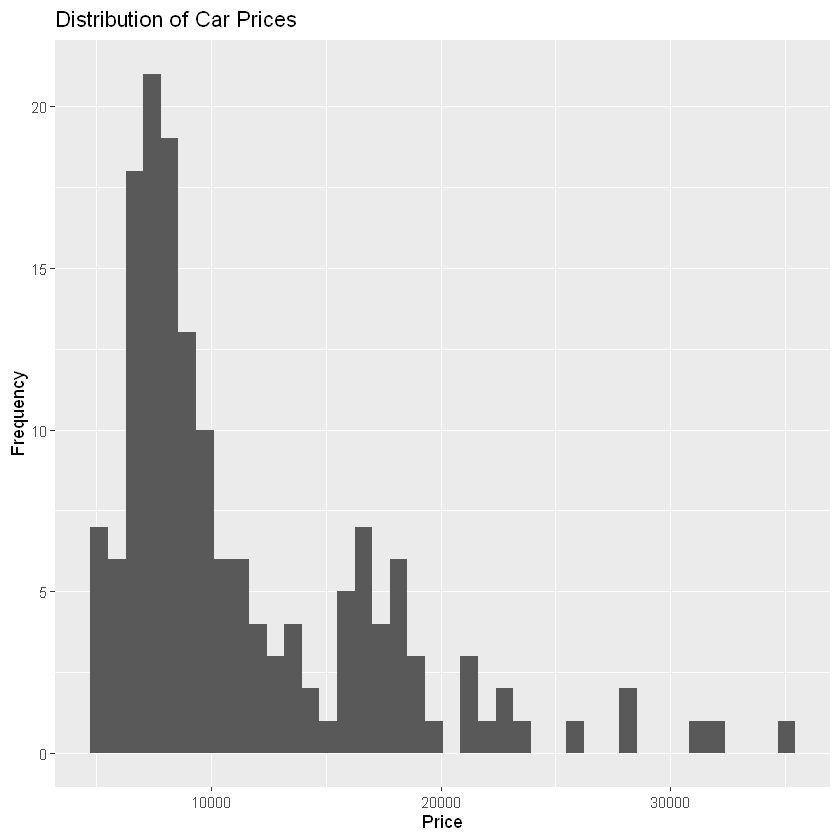

In [19]:
# Distribution of car prices
ggplot(data, aes(x = price)) +
  geom_histogram(bins = 40) +
  labs(title = "Distribution of Car Prices", x = "Price", y = "Frequency")


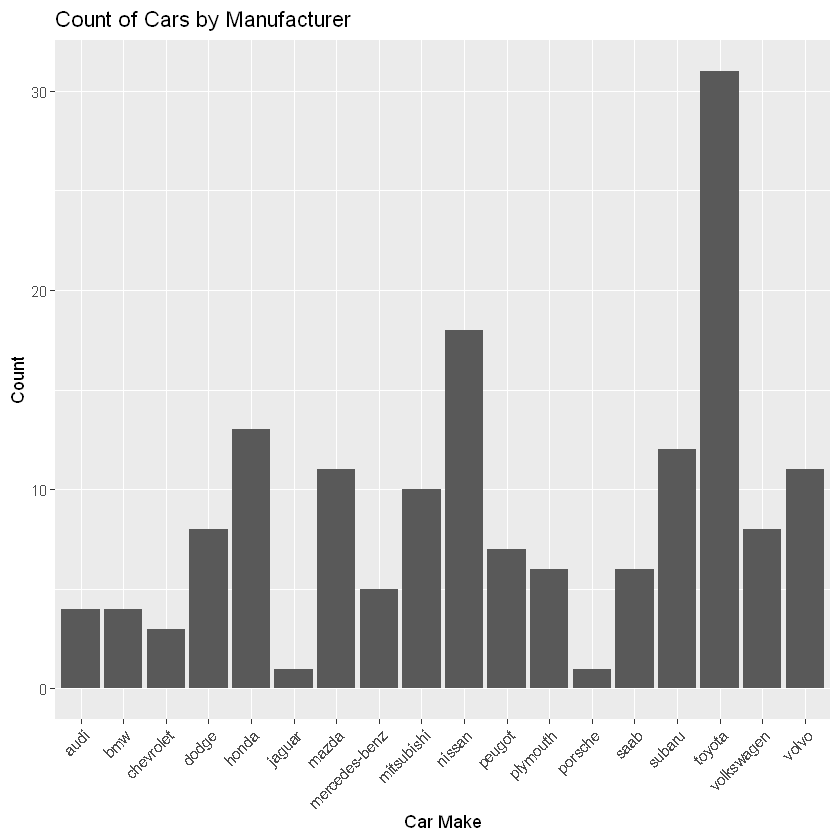

In [22]:
#Count of Cars by Make
ggplot(data, aes(x = make)) +
  geom_bar() +
  labs(title = "Count of Cars by Manufacturer", x = "Car Make", y = "Count") +
  theme(axis.text.x = element_text(angle = 45, hjust = 1))


<h2>horsepower vs price</h2>

`geom_smooth()` using formula = 'y ~ x'


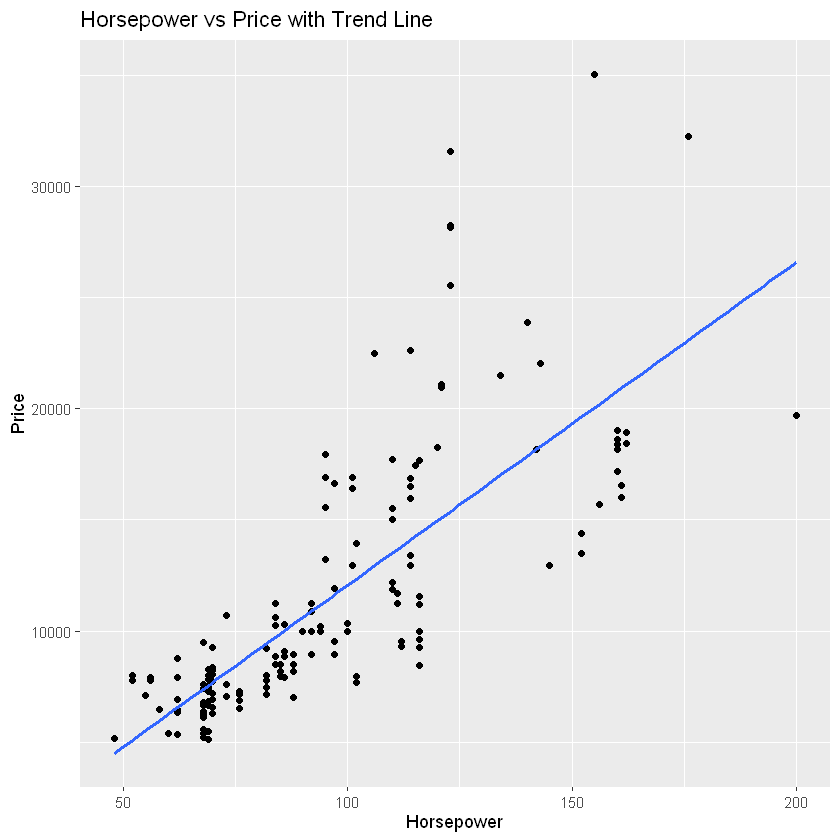

In [25]:
ggplot(data, aes(x = horsepower, y = price)) +
  geom_point() +
  geom_smooth(method = "lm", se = FALSE) +
  labs(title = "Horsepower vs Price with Trend Line",
       x = "Horsepower",
       y = "Price")


<h2>Engine Size vs Price</h2>

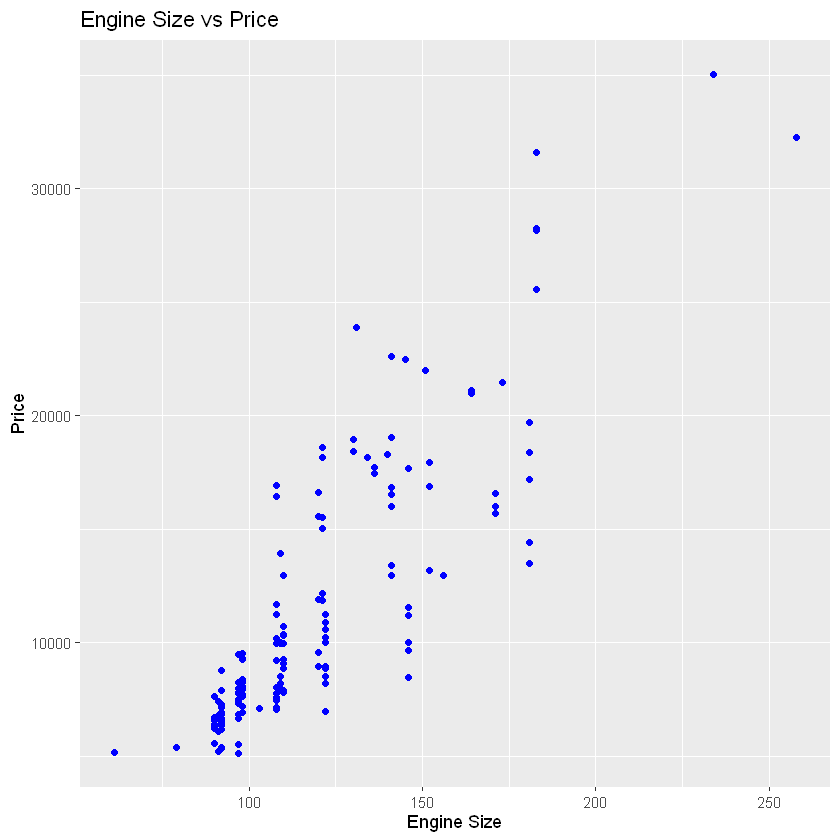

In [29]:
ggplot(data, aes(x = engine_size, y = price)) +
  geom_point(color = "blue") +
  labs(title = "Engine Size vs Price", x = "Engine Size", y = "Price")


<h2>Price vs Fuel Type</h2>

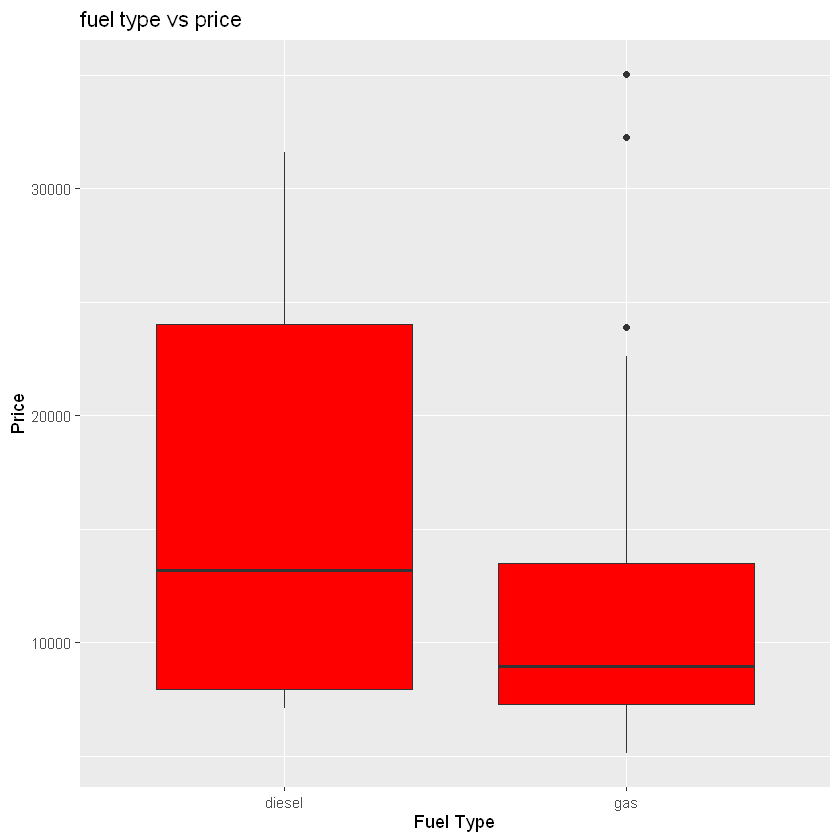

In [30]:
ggplot(data,aes(x=fuel_type,y=price))+geom_boxplot(fill="red")+labs(title="fuel type vs price", x = "Fuel Type", y = "Price")

<h2>Drive wheels vs Mileage</h2>

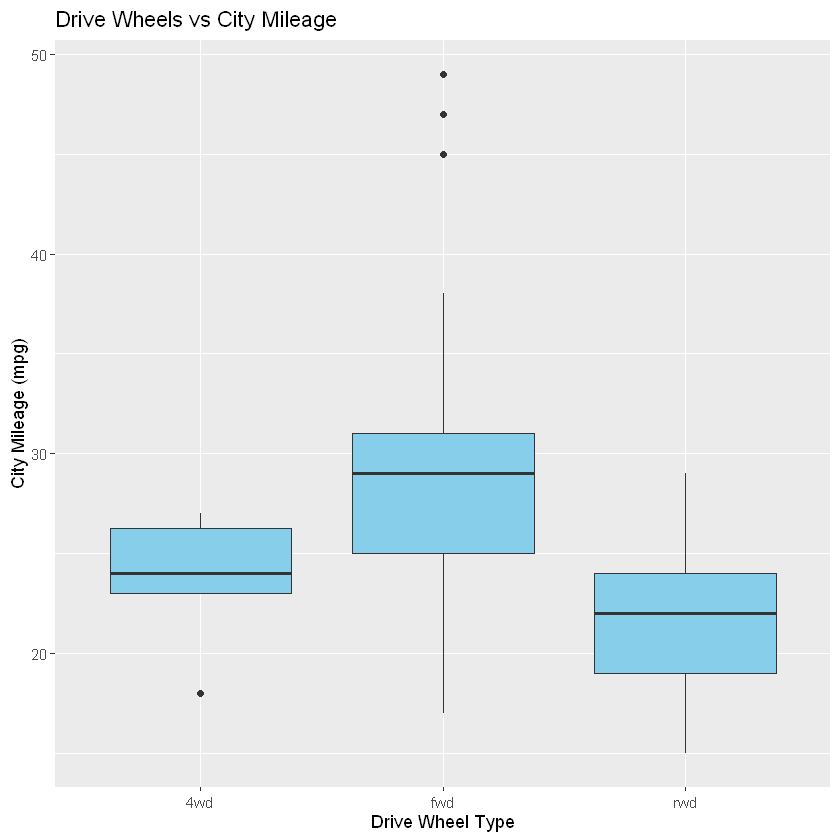

In [33]:
ggplot(data, aes(x = drive_wheels, y = city_mpg)) +
  geom_boxplot(fill = "skyblue") +
  labs(title = "Drive Wheels vs City Mileage",
       x = "Drive Wheel Type",
       y = "City Mileage (mpg)")


<h2>Statistical Test-Correlation with P-Value</h2>

In [35]:
cor.test(data$horsepower,data$price)


	Pearson's product-moment correlation

data:  data$horsepower and data$price
t = 14.646, df = 157, p-value < 2.2e-16
alternative hypothesis: true correlation is not equal to 0
95 percent confidence interval:
 0.6852759 0.8186925
sample estimates:
      cor 
0.7598739 


<h2>T-Test: Comparing Price Between Fuel type</h2>

In [38]:
t.test(price ~ fuel_type, data = data)



	Welch Two Sample t-test

data:  price by fuel_type
t = 2.2464, df = 15.05, p-value = 0.04011
alternative hypothesis: true difference in means between group diesel and group gas is not equal to 0
95 percent confidence interval:
   269.5453 10206.5019
sample estimates:
mean in group diesel    mean in group gas 
            16189.60             10951.58 


In [40]:
model <- lm(price ~ engine_size + horsepower + city_mpg, data = data)
summary(model)



Call:
lm(formula = price ~ engine_size + horsepower + city_mpg, data = data)

Residuals:
    Min      1Q  Median      3Q     Max 
-8217.4 -1665.5  -149.3  1372.3 10941.9 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept) -1809.42    3305.40  -0.547   0.5849    
engine_size   125.58      13.78   9.110 3.95e-16 ***
horsepower     20.94      17.87   1.172   0.2431    
city_mpg     -140.42      73.48  -1.911   0.0579 .  
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 3074 on 155 degrees of freedom
Multiple R-squared:  0.7316,	Adjusted R-squared:  0.7264 
F-statistic: 140.9 on 3 and 155 DF,  p-value: < 2.2e-16


<h2>Predict Price for a New Car</h2>

In [41]:
# Example: Predict price for a new car
new_car <- data.frame(engine_size = 150, horsepower = 120, city_mpg = 25)
predicted_price <- predict(model, new_car)
predicted_price


1 
16029.98

In [15]:
library(randomForest)
rf_model <- randomForest(price ~ engine_size+ horsepower + city_mpg, data = data, ntree = 200)
summary(rf_model)


                Length Class  Mode     
call              4    -none- call     
type              1    -none- character
predicted       159    -none- numeric  
mse             200    -none- numeric  
rsq             200    -none- numeric  
oob.times       159    -none- numeric  
importance        3    -none- numeric  
importanceSD      0    -none- NULL     
localImportance   0    -none- NULL     
proximity         0    -none- NULL     
ntree             1    -none- numeric  
mtry              1    -none- numeric  
forest           11    -none- list     
coefs             0    -none- NULL     
y               159    -none- numeric  
test              0    -none- NULL     
inbag             0    -none- NULL     
terms             3    terms  call     

In [25]:
new_car1<-data.frame(engine_size=150,horsepower=120,city_mpg=25)
predict_price<-predict(rf_model,new_car1)
predict_price


1 
16521.57